**PCA–Dimensionality Reduction-Sklearn digits dataset**

Load lib

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Load Dataset

In [7]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


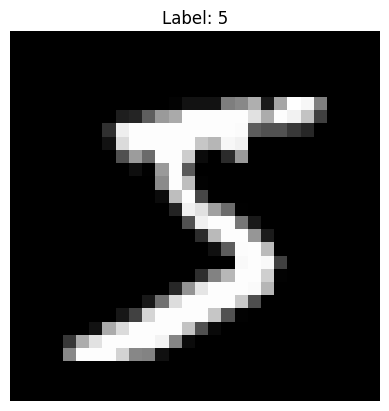

In [8]:
# Flatten images for ML/PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Display one image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

Scale features using StandardScaler for correct PCA performance.

In [10]:
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler

# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

Scaled train shape: (60000, 784)
Scaled test shape: (10000, 784)


Apply PCA with multiple component counts like 2, 10, 30, 50

In [13]:
from sklearn.decomposition import PCA

components = [2, 10, 30, 50]

pca_models = {}
X_pca_results = {}

for n in components:
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    
    print(f"PCA with {n} components → shape:", X_pca.shape,
          "| Explained variance:", round(pca.explained_variance_ratio_.sum(), 4))

PCA with 2 components → shape: (60000, 2) | Explained variance: 0.0972
PCA with 10 components → shape: (60000, 10) | Explained variance: 0.2767
PCA with 30 components → shape: (60000, 30) | Explained variance: 0.4519
PCA with 50 components → shape: (60000, 50) | Explained variance: 0.5511


Track explained variance ratio for each PCA setting

In [14]:
from sklearn.decomposition import PCA

components = [2, 10, 30, 50]
explained_variance = {}

for n in components:
    pca = PCA(n_components=n, random_state=42)
    pca.fit(X_scaled)
    
    explained_variance[n] = pca.explained_variance_ratio_.sum()

# Display results
for n, var in explained_variance.items():
    print(f"PCA with {n} components → Explained Variance: {var:.4f}")

PCA with 2 components → Explained Variance: 0.0972
PCA with 10 components → Explained Variance: 0.2767
PCA with 30 components → Explained Variance: 0.4519
PCA with 50 components → Explained Variance: 0.5511


Plot cumulative variance to choose best number of components

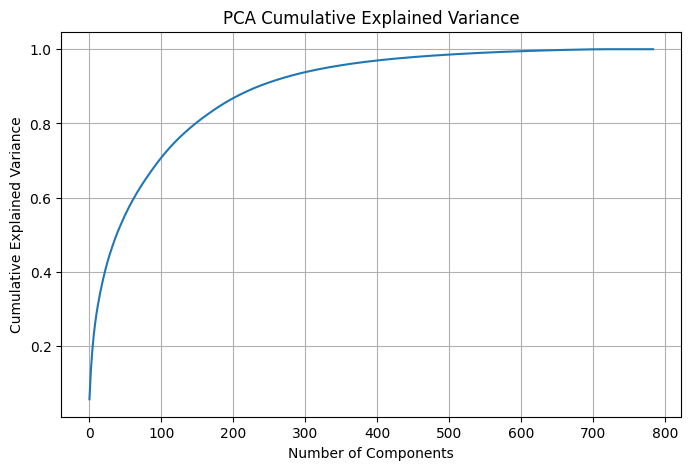

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA with all components
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.grid(True)
plt.show()

Transform original dataset into reduced dimensional dataset

In [16]:
from sklearn.decomposition import PCA

# Choose optimal components (based on cumulative variance)
n_components = 30

# Fit PCA and transform data
pca = PCA(n_components=n_components, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_reduced.shape)
print("Explained variance retained:", 
      round(pca.explained_variance_ratio_.sum(), 4))

Original shape: (60000, 784)
Reduced shape: (60000, 30)
Explained variance retained: 0.4519


Train Logistic Regression on reduced dataset

In [19]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=30, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9527777777777777
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.88      0.83      0.86        36
           2       0.97      1.00      0.99        35
           3       0.97      1.00      0.99        37
           4       0.92      0.97      0.95        36
           5       1.00      1.00      1.00        37
           6       0.97      0.97      0.97        36
           7       1.00      0.97      0.99        36
           8       0.84      0.89      0.86        35
           9       0.97      0.94      0.96        36

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



Compare accuracy of original vs reduced dataset model

In [21]:
# Prepare data
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data
digits = load_digits()
X = digits.data
y = digits.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (same split for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# Logistic Regression on Original Dataset
lr_original = LogisticRegression(max_iter=1000, random_state=42)
lr_original.fit(X_train, y_train)

y_pred_orig = lr_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_orig)

print("Accuracy (Original Features):", acc_original)

Accuracy (Original Features): 0.9722222222222222


Logistic Regression on PCA-Reduced Dataset

In [23]:
# Apply PCA
pca = PCA(n_components=30, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Split again using same settings
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

print("Accuracy (PCA Reduced Features):", acc_pca)


Accuracy (PCA Reduced Features): 0.9527777777777777


Final Comparison

In [24]:
print("\nAccuracy Comparison")
print("-------------------")
print(f"Original Features Accuracy : {acc_original:.4f}")
print(f"PCA Reduced Accuracy       : {acc_pca:.4f}")
print(f"Variance Retained (PCA)    : {pca.explained_variance_ratio_.sum():.4f}")


Accuracy Comparison
-------------------
Original Features Accuracy : 0.9722
PCA Reduced Accuracy       : 0.9528
Variance Retained (PCA)    : 0.8932


Visualize PCA 2D scatter plot to observe separation

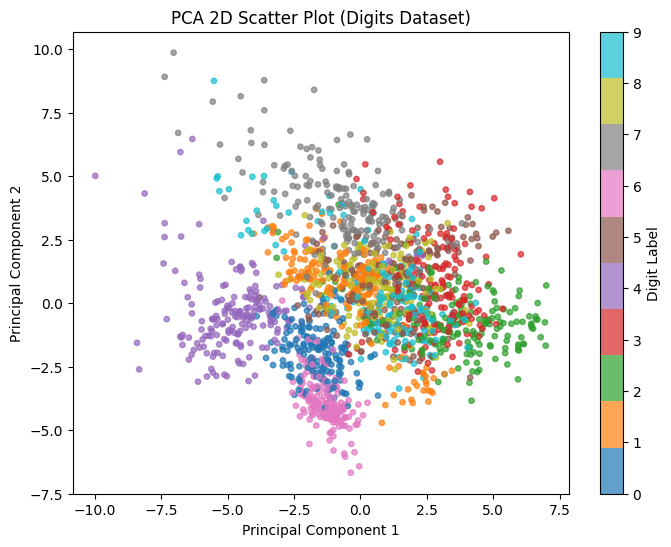

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=y,
    cmap='tab10',
    s=15,
    alpha=0.7
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Scatter Plot (Digits Dataset)")
plt.colorbar(scatter, label="Digit Label")
plt.show()

Store Reduced Dataset as CSV

In [29]:
import pandas as pd

# Create DataFrame
df_reduced = pd.DataFrame(
    X_reduced,
    columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])]
)

# Add labels
df_reduced["label"] = y

# Save to CSV
df_reduced.to_csv("digits_pca_reduced.csv", index=False)

Accuracy Comparison Report

In [34]:
import pandas as pd

# Create report DataFrame
accuracy_report = pd.DataFrame({
    "Dataset Type": ["Original Dataset", "PCA Reduced Dataset"],
    "Number of Features": [X_scaled.shape[1], X_reduced.shape[1]],
    "Accuracy": [acc_original, acc_pca]
})

# Print textual summary
print("Accuracy Comparison Report")
print("--------------------------")
print("Model Used              : Logistic Regression")
print(f"PCA Components Used     : {X_reduced.shape[1]}")
print(f"Variance Retained (PCA) : {pca.explained_variance_ratio_.sum():.4f}")
print()

# Display tabular report
accuracy_report


Accuracy Comparison Report
--------------------------
Model Used              : Logistic Regression
PCA Components Used     : 30
Variance Retained (PCA) : 0.8932



,Dataset Type,Number of Features,Accuracy
0,Original Dataset,64,0.972222
1,PCA Reduced Dataset,30,0.952778


The Logistic Regression model trained on the original dataset achieves slightly higher accuracy compared to the PCA-reduced dataset. However, PCA significantly reduces the number of features while retaining most of the variance, resulting in comparable performance with improved computational efficiency. This demonstrates that PCA is effective for dimensionality reduction with minimal impact on classification accuracy.